# Performance Metrics for GPU during job

In [3]:
import yaml
import datetime
import pytz
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot

# Functions used throughout
def format_plot(fig,ax):
   matplotlib.style.use('fivethirtyeight')
   matplotlib.pyplot.set_cmap('tab10')
   ax.grid(True)
   ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
   fig.set_size_inches(11.69, 8.27)
   ax.set_xlabel('Job Run Time (s)', fontsize = 16, weight = 'bold')
   ax.set_ylabel('GPU Utlisation (%)', fontsize = 16, weight = 'bold')
   ax.set_facecolor('lightgrey')

ModuleNotFoundError: No module named 'pytz'

Change the path of logfile to wherever your filtered log file is.

In [2]:
logfile='your/logfile/here'

Extract filename and date from 'logfile'

In [3]:
logfile_date = logfile[-23:-13]
logfile_date

'1606276955'

## Use pandas to read in log file from nvidia-smi

Added column called 'Garbage' to account for mismatching sizes - guess this needs to be altered in the filtering??

In [4]:
gpu_data = pd.read_csv(logfile, delim_whitespace=True, header=None)

In [5]:
# gpu    sm   mem   enc   dec    fb  bar1 rxpci txpci   pwr  temp
gpu_data.columns = ['Time', 'GPU_Index', 'Utilisation', 'Memory', 'Video_encoding', 'Video_decoding', 'Mem_usage', 'bar1', 'Transfer_in' ,'Transfer_out' ,'Power' ,'Temp', 'Garbage']
# Move the start time to zero
gpu_data.Time = gpu_data.Time - gpu_data.Time.min()
gpu_data.head(10)

,Time,GPU_Index,Utilisation,Memory,Video_encoding,Video_decoding,Mem_usage,bar1,Transfer_in,Transfer_out,Power,Temp,Garbage
0,0.000000,0,0,0,0,0,3,3,0,0,9,32,-
1,1.053325,0,4,0,0,0,14344,7,0,20,26,33,-
2,2.108498,0,3,0,0,0,14528,7,300,41,26,33,-
3,3.181700,0,1,0,0,0,14732,7,0,0,27,33,-
4,4.228528,0,2,0,0,0,14732,7,0,0,27,33,-
5,5.280593,0,50,36,0,0,14732,7,235,35,55,35,-
6,6.327029,0,55,39,0,0,14732,7,237,35,55,36,-
7,7.380860,0,4,2,0,0,14732,7,39,5,33,35,-
8,8.433519,0,4,2,0,0,14732,7,39,5,34,35,-
9,9.482740,0,1,0,0,0,14732,7,0,0,26,35,-


## Plot GPU utilisation and memory transfers


Memory = Percent of time over the past sample period during which global (device) memory was being read or written.
The sample period may be between 1 second and 1/6 second depending on the product.

<AxesSubplot:xlabel='Time'>

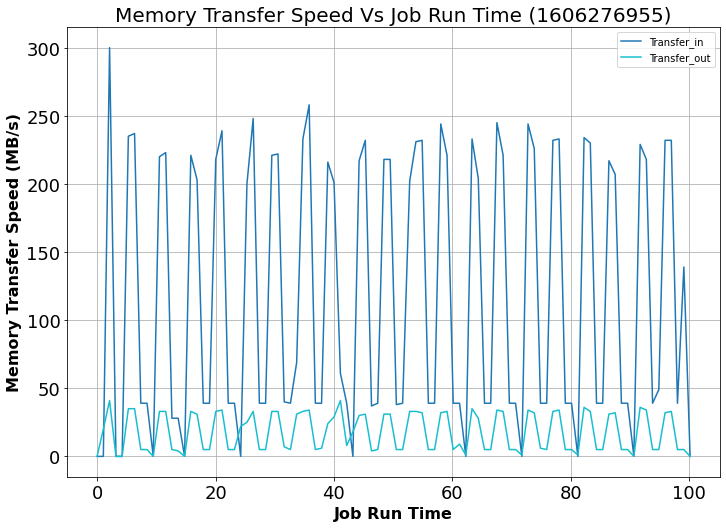

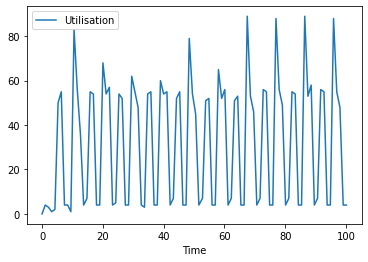

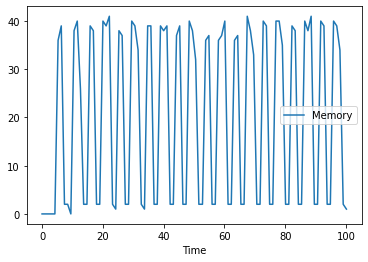

In [6]:
#fig = matplotlib.pyplot.figure("figname",figsize=(50,25))
#plt = matplotlib.pyplot.plot('time','1',data=cpu_data, index=cpu_data[0])
#matplotlib.style.use('seaborn-colorblind')
#matplotlib.style.use('ggplot')
#matplotlib.style.use('fivethirtyeight')
# Set colors
c = 'gbrcyk'
gpu_data.plot(x='Time', y=['Transfer_in','Transfer_out'],figsize=(11.69, 8.27),colormap='tab10')
ax = matplotlib.pyplot.gca()
transfer_fig = ax.figure
ax.grid(True)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set_xlabel('Job Run Time', fontsize = 16, weight = 'bold')
ax.set_ylabel('Memory Transfer Speed (MB/s)', fontsize = 16, weight = 'bold')
ax.set_title('Memory Transfer Speed Vs Job Run Time ('+logfile_date+')', fontsize = 20)

filename = 'GPUTransfers-' + logfile_date + '.png'
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi=300)
gpu_data.plot(x='Time', y='Utilisation')
gpu_data.plot(x='Time', y='Memory')

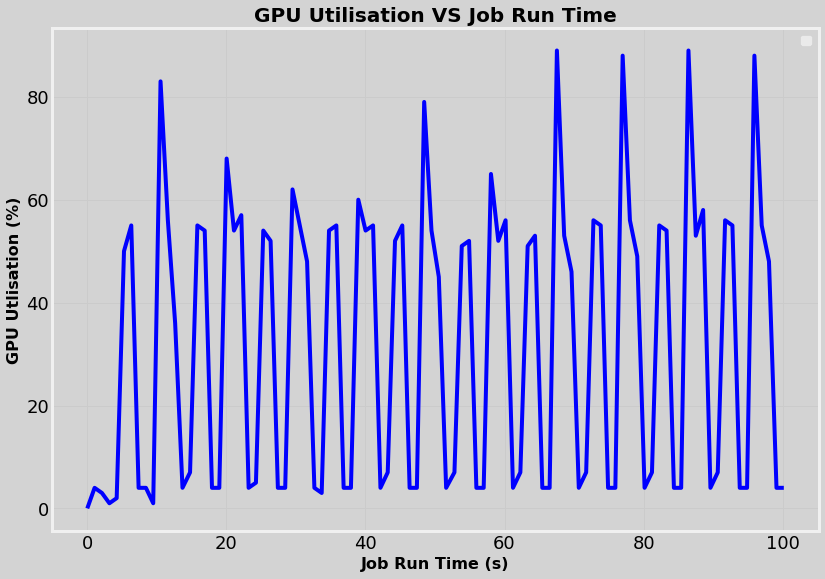

In [30]:
ax = gpu_data.plot(x='Time', y=['Utilisation'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Utilisation VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)

# Save graph of folder creation
filename = 'Tutorial-GPU-Utilisation' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [31]:
gpu_data.Utilisation.mean()

32.052083333333336

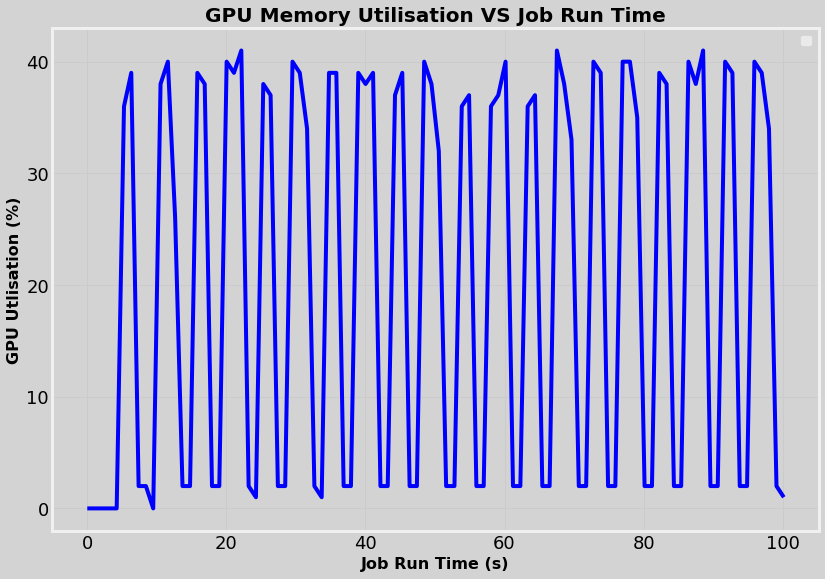

In [33]:
ax = gpu_data.plot(x='Time', y=['Memory'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Memory Utilisation VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Utilisation' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [34]:
gpu_data.Memory.mean()

20.5625

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

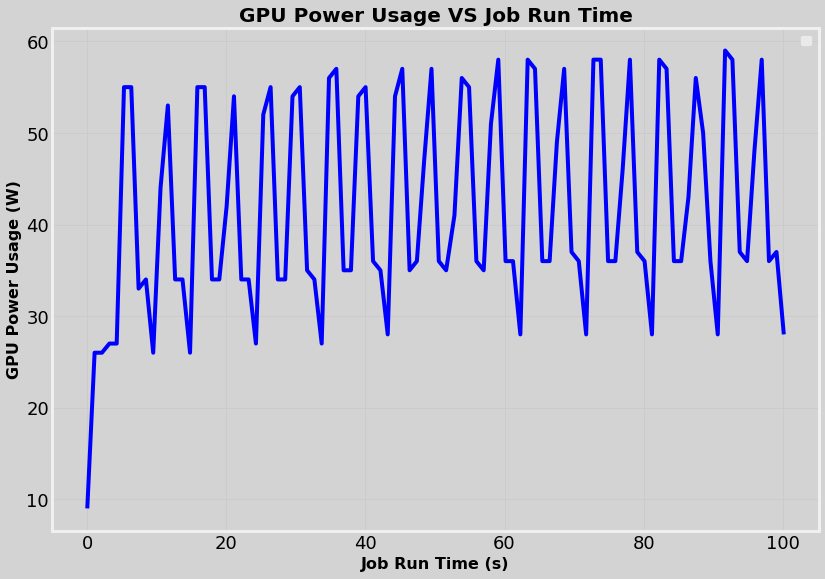

In [36]:
ax = gpu_data.plot(x='Time', y=['Power'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Power Usage VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Power Usage (W)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Power-Usage' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [37]:
gpu_data.Power.mean()

41.895833333333336

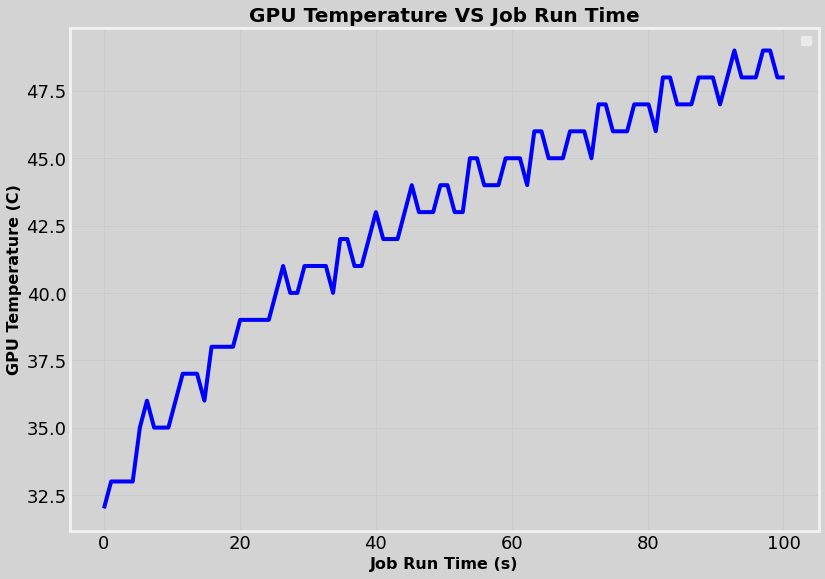

In [39]:
ax = gpu_data.plot(x='Time', y=['Temp'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Temperature VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Temperature (C)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Temp' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [40]:
gpu_data.Temp.mean()

42.65625

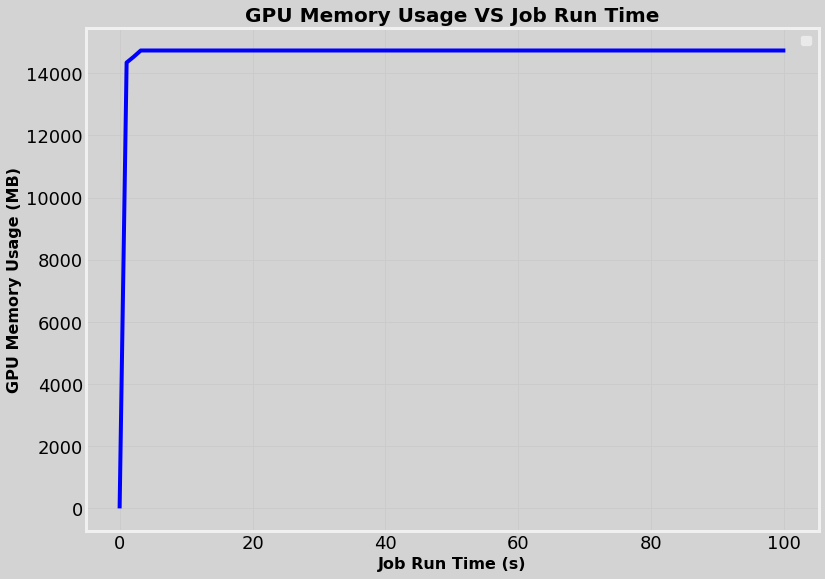

In [41]:
ax = gpu_data.plot(x='Time', y=['Mem_usage'],color=['b'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Memory Usage VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Memory Usage (MB)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Usage' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())


In [42]:
gpu_data.Mem_usage.mean()

14572.40625

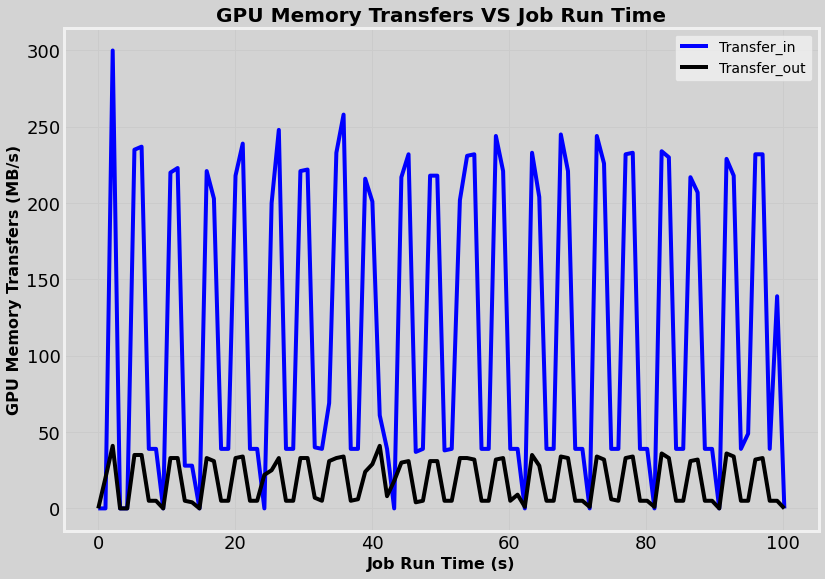

In [43]:
#gpu_data.plot(x='Time', y=['Transfer_in','Transfer_out'],figsize=(11.69, 8.27),colormap='tab10')

ax = gpu_data.plot(x='Time', y=['Transfer_in','Transfer_out'],color=['b','black'])
# Set the background to match
fig = matplotlib.pyplot.gcf()
fig.patch.set_facecolor('lightgrey')
# Remove legend
#ax.legend('')
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('GPU Memory Transfers VS Job Run Time', fontsize = 20, weight = 'bold')
format_plot(fig,ax)
ax.set_ylabel('GPU Memory Transfers (MB/s)')

# Save graph of folder creation
filename = 'Tutorial-GPU-Memory-Transfers' + '.png'
# Adjust layout to ensure saved file fits
matplotlib.pyplot.tight_layout()
# Edit with your own filepath
matplotlib.pyplot.savefig('your/place/to/save/plots' + filename, dpi = (300), facecolor=fig.get_facecolor())

